In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data
import acquire
import prepare
from scipy import stats

# matplotlib for visualizations
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = acquire.get_iris_data()
iris_df = prepare.prep_iris(iris_df)

Using cached csv


In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [14]:
iris_df.shape

(150, 7)

In [7]:
# Split the data

train, test = train_test_split(iris_df, test_size = .2, random_state = 123, stratify = iris_df.species)

In [8]:
train, validate = train_test_split(train, test_size =.3 , random_state = 123, stratify= train.species)

In [25]:
# Make sure the split data adds up to total data
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [15]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


# UNIVARIATE STATS

## Quantitative variable

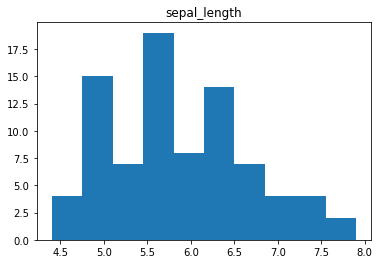

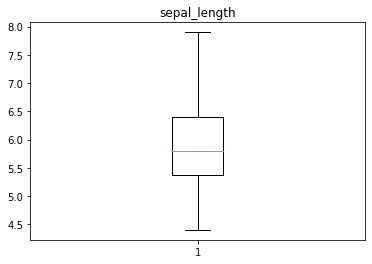

       sepal_length
count     84.000000
mean       5.870238
std        0.769099
min        4.400000
25%        5.375000
50%        5.800000
75%        6.400000
max        7.900000


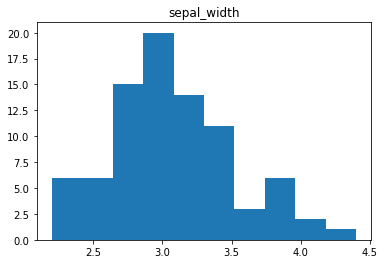

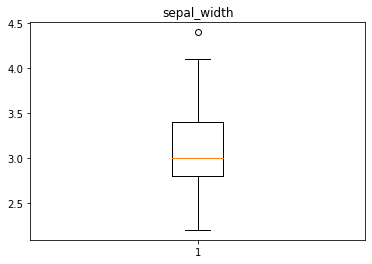

       sepal_width
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000


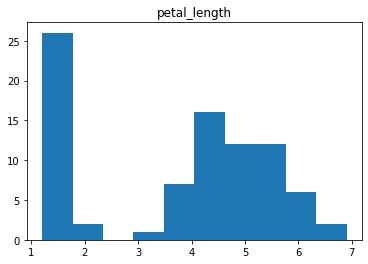

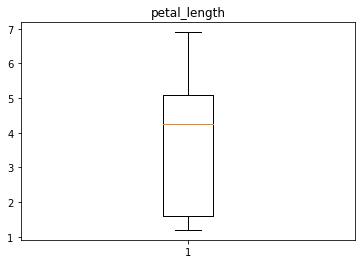

       petal_length
count     84.000000
mean       3.771429
std        1.734940
min        1.200000
25%        1.600000
50%        4.250000
75%        5.100000
max        6.900000


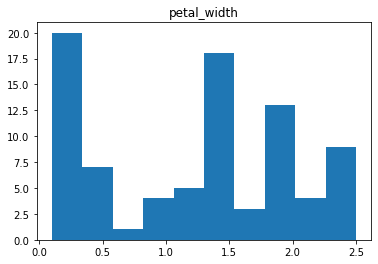

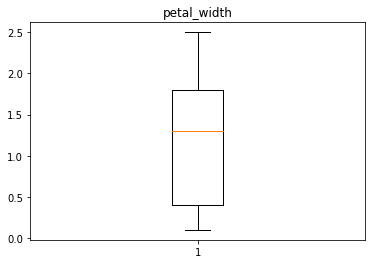

       petal_width
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000


In [36]:
# Setting all of the columns that are measurable to 'quantitative' variable

quantitative = [col for col in train.columns[train.dtypes == 'float64']]

# for each column
for col in quantitative:
    
    # histogram of columns distribution
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    
    # boxplot of columns distribution
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    
    # summary statistics
    print(pd.DataFrame(train[col].describe()))

## Categorical variable

            species_counts
versicolor              28
setosa                  28
virginica               28


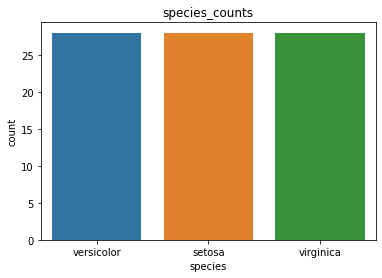

In [28]:
# create frquency table and bar plot of frequencies from categorical column

categorical = ['species']

# for statement
for col in categorical:
    
    # display a frequency table
    print(pd.DataFrame(train[col].value_counts()).rename(columns ={col: f'{col}_counts'}))
          
    # display bar plot
    sns.countplot(data=train, x=col)
    
    plt.title(f'{col}_counts')
    plt.show

In [23]:
#compute the descriptive statistics for each species

quantitative = [col for col in train.columns[train.dtypes == 'float64']]
target = 'species'
line_break = ('-' * 31)

for col in quantitative:
    print(col)
    print(train.groupby(by = target)[col].describe())
    print(line_break)

sepal_length
            count      mean       std  min    25%   50%    75%  max
species                                                            
setosa       28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8
versicolor   28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9
virginica    28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9
-------------------------------
sepal_width
            count      mean       std  min    25%  50%  75%  max
species                                                         
setosa       28.0  3.467857  0.427788  2.3  3.275  3.4  3.8  4.4
versicolor   28.0  2.796429  0.280848  2.3  2.600  2.8  3.0  3.4
virginica    28.0  2.960714  0.318956  2.2  2.800  3.0  3.1  3.8
-------------------------------
petal_length
            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       28.0  1.507143  0.184448  1.2  1.4  1.50  1.600  1.9
versicolor   28.0  4.271429  0.4099

# BIVARIATE STATS

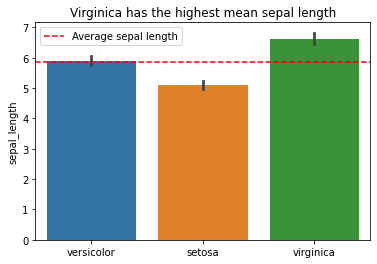

In [54]:
# visualize measurement types(y-axis) with species variable(x-axis) w/ barplots. 

# title is created based off of the graph
plt.title('Virginica has the highest mean sepal length')

#using seaborn to plot 
sns.barplot(x='species', y='sepal_length', data=train)

# create mean average line based on Y metric and set to variable
mean_sepal_length = train.sepal_length.mean()
#specifics for the mean line when plotting
plt.axhline(y=mean_sepal_length, label = "Average sepal length", linestyle = '--', color ='red')
#clean up the graph
plt.xlabel('')
plt.legend()
plt.show()


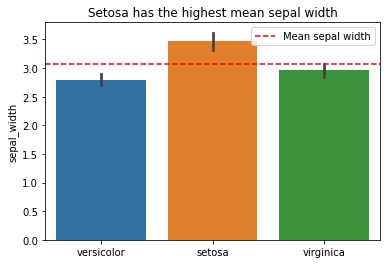

In [60]:
sns.barplot(x='species', y='sepal_width', data = train)


plt.title('Setosa has the highest mean sepal width')
mean_sepal_width = train.sepal_width.mean()
plt.axhline(y=mean_sepal_width, label = 'Mean sepal width', color = 'red', linestyle = '--')
plt.xlabel('')
plt.legend()
plt.show()

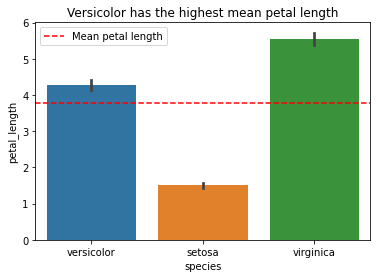

In [72]:

plt.title('Versicolor has the highest mean petal length')
sns.barplot(x='species', y='petal_length', data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(y=mean_petal_length, color ='red', linestyle ='--', label='Mean petal length')
plt.xlabel=('')
plt.legend()
plt.show()

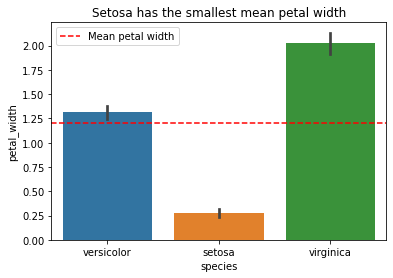

In [76]:

plt.title('Setosa has the smallest mean petal width')
sns.barplot(x='species', y='petal_width', data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(y=mean_petal_width, color ='red', linestyle ='--', label='Mean petal width')
plt.xlabel=('')
plt.legend()
plt.show()

### DESCRIPTIVE COMPARISON

In [85]:
# virginica descriptive stats
# create and assigning dataframes showing the descriptive analysis of specific statistics

virginica_describe_sl = pd.DataFrame(train[train.species =='virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species =='virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species =='virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species =='virginica'].petal_width.describe())

# combine the previous dataframes for overall descriptive analysis

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis = 1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis = 1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis = 1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [96]:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,6.625000,2.960714,5.535714,2.021429,0.0,1.0
std,0.532378,0.318956,0.496815,0.293582,0.0,0.0
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,6.300000,2.800000,5.100000,1.800000,0.0,1.0
50%,6.450000,3.000000,5.500000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


In [86]:
# Setosa descriptive stats

setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [95]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,28.000000,28.000000,28.000000,28.00000,28.0,28.0
mean,5.089286,3.467857,1.507143,0.27500,0.0,0.0
std,0.360390,0.427788,0.184448,0.12057,0.0,0.0
min,4.400000,2.300000,1.200000,0.10000,0.0,0.0
25%,4.875000,3.275000,1.400000,0.20000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.20000,0.0,0.0
75%,5.400000,3.800000,1.600000,0.40000,0.0,0.0
max,5.800000,4.400000,1.900000,0.60000,0.0,0.0


In [87]:
# veriscolor descriptive stats

versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


In [94]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.896429,2.796429,4.271429,1.314286,1.0,0.0
std,0.425556,0.280848,0.409930,0.199470,0.0,0.0
min,4.900000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.600000,2.600000,4.000000,1.200000,1.0,0.0
50%,5.800000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.125000,3.000000,4.525000,1.500000,1.0,0.0
max,6.900000,3.400000,5.100000,1.800000,1.0,0.0


## Mann-Whitney Test

## H0: Virginica petals on average are lower or the same as Versicolor petals
## Ha: Virginica petals on average are significantly greater than Versicolor petals

In [98]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']
 
# establish a one-tailded test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative = 'greater')
t, p

(767.0, 3.235595834904965e-10)

-small p value


In [ ]:
alpha = .05